Objective
1. load data
2. analyze data
3. train a model (with and without nomalized data)
4. choose the right linkage
5. choose the right n_cluster

# Load data

In [243]:
#import libraries and show data

import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans

#data : from 
#https://www.kaggle.com/abcsds/pokemon
#Pokemon name and its stats
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# Analyze data

In [244]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [245]:
df.drop(['#'],axis='columns',inplace=True)

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [247]:
df.shape

(800, 12)

In [248]:
#change bool to object
#True = yes, False = no
new_leg=[]
for i in df['Legendary']:
  if i == True:
    new_leg.append('yes')
  else:
    new_leg.append('no')
df['new_leg']=pd.Series(new_leg)
df.drop(['Legendary'], axis='columns', inplace=True)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,new_leg
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,no
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,no
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,no
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,no
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,no


In [249]:
#find all unique catagorical data
obj=[]
for i in list(df.columns):
  if df[i].dtype == 'O':
    obj.append(i)
    print(i+ ': '+ str(df[i].unique()) +'\n' )

Name: ['Bulbasaur' 'Ivysaur' 'Venusaur' 'VenusaurMega Venusaur' 'Charmander'
 'Charmeleon' 'Charizard' 'CharizardMega Charizard X'
 'CharizardMega Charizard Y' 'Squirtle' 'Wartortle' 'Blastoise'
 'BlastoiseMega Blastoise' 'Caterpie' 'Metapod' 'Butterfree' 'Weedle'
 'Kakuna' 'Beedrill' 'BeedrillMega Beedrill' 'Pidgey' 'Pidgeotto'
 'Pidgeot' 'PidgeotMega Pidgeot' 'Rattata' 'Raticate' 'Spearow' 'Fearow'
 'Ekans' 'Arbok' 'Pikachu' 'Raichu' 'Sandshrew' 'Sandslash' 'Nidoran♀'
 'Nidorina' 'Nidoqueen' 'Nidoran♂' 'Nidorino' 'Nidoking' 'Clefairy'
 'Clefable' 'Vulpix' 'Ninetales' 'Jigglypuff' 'Wigglytuff' 'Zubat'
 'Golbat' 'Oddish' 'Gloom' 'Vileplume' 'Paras' 'Parasect' 'Venonat'
 'Venomoth' 'Diglett' 'Dugtrio' 'Meowth' 'Persian' 'Psyduck' 'Golduck'
 'Mankey' 'Primeape' 'Growlithe' 'Arcanine' 'Poliwag' 'Poliwhirl'
 'Poliwrath' 'Abra' 'Kadabra' 'Alakazam' 'AlakazamMega Alakazam' 'Machop'
 'Machoke' 'Machamp' 'Bellsprout' 'Weepinbell' 'Victreebel' 'Tentacool'
 'Tentacruel' 'Geodude' 'Graveler' 'Gol

In [250]:
df_no_unknown=df[df !=np.nan].dropna()
df_no_unknown.shape

(414, 12)

In [251]:
#nan check 
for i in list(df_no_unknown.columns):
  if df_no_unknown[i].dtype == 'O':
    print(i+ ': '+ str(df_no_unknown[i].unique()) +'\n' )

Name: ['Bulbasaur' 'Ivysaur' 'Venusaur' 'VenusaurMega Venusaur' 'Charizard'
 'CharizardMega Charizard X' 'CharizardMega Charizard Y' 'Butterfree'
 'Weedle' 'Kakuna' 'Beedrill' 'BeedrillMega Beedrill' 'Pidgey' 'Pidgeotto'
 'Pidgeot' 'PidgeotMega Pidgeot' 'Spearow' 'Fearow' 'Nidoqueen' 'Nidoking'
 'Jigglypuff' 'Wigglytuff' 'Zubat' 'Golbat' 'Oddish' 'Gloom' 'Vileplume'
 'Paras' 'Parasect' 'Venonat' 'Venomoth' 'Poliwrath' 'Bellsprout'
 'Weepinbell' 'Victreebel' 'Tentacool' 'Tentacruel' 'Geodude' 'Graveler'
 'Golem' 'Slowpoke' 'Slowbro' 'SlowbroMega Slowbro' 'Magnemite' 'Magneton'
 "Farfetch'd" 'Doduo' 'Dodrio' 'Dewgong' 'Cloyster' 'Gastly' 'Haunter'
 'Gengar' 'GengarMega Gengar' 'Onix' 'Exeggcute' 'Exeggutor' 'Rhyhorn'
 'Rhydon' 'Starmie' 'Mr. Mime' 'Scyther' 'Jynx' 'PinsirMega Pinsir'
 'Gyarados' 'GyaradosMega Gyarados' 'Lapras' 'Omanyte' 'Omastar' 'Kabuto'
 'Kabutops' 'Aerodactyl' 'AerodactylMega Aerodactyl' 'Articuno' 'Zapdos'
 'Moltres' 'Dragonite' 'MewtwoMega Mewtwo X' 'Hoothoot' 'Noc

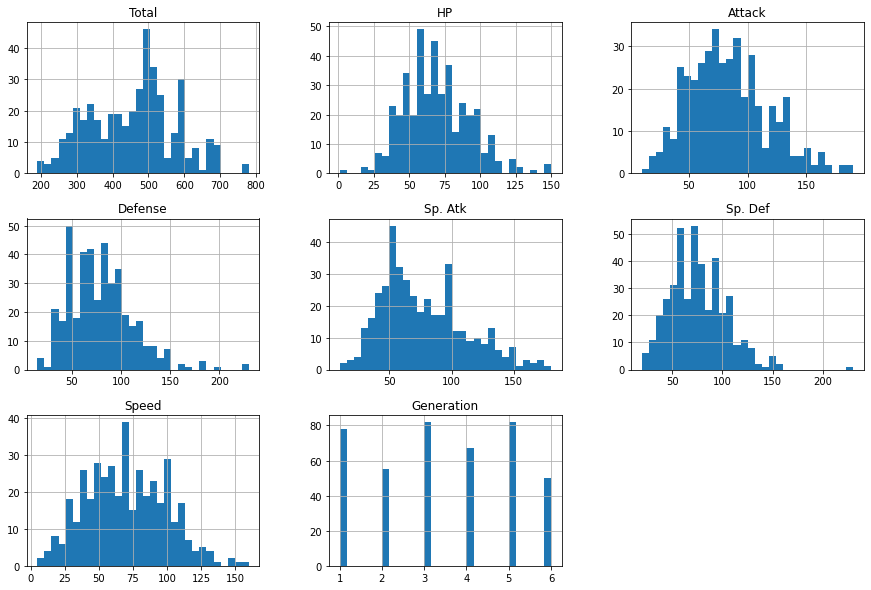

In [252]:
#distribution plot of all numeric data
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import pandas as pd
from pandas import Series, DataFrame
df_no_unknown.hist(bins=30,figsize=(15,10),grid=True);

In [253]:
len(obj)

4

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

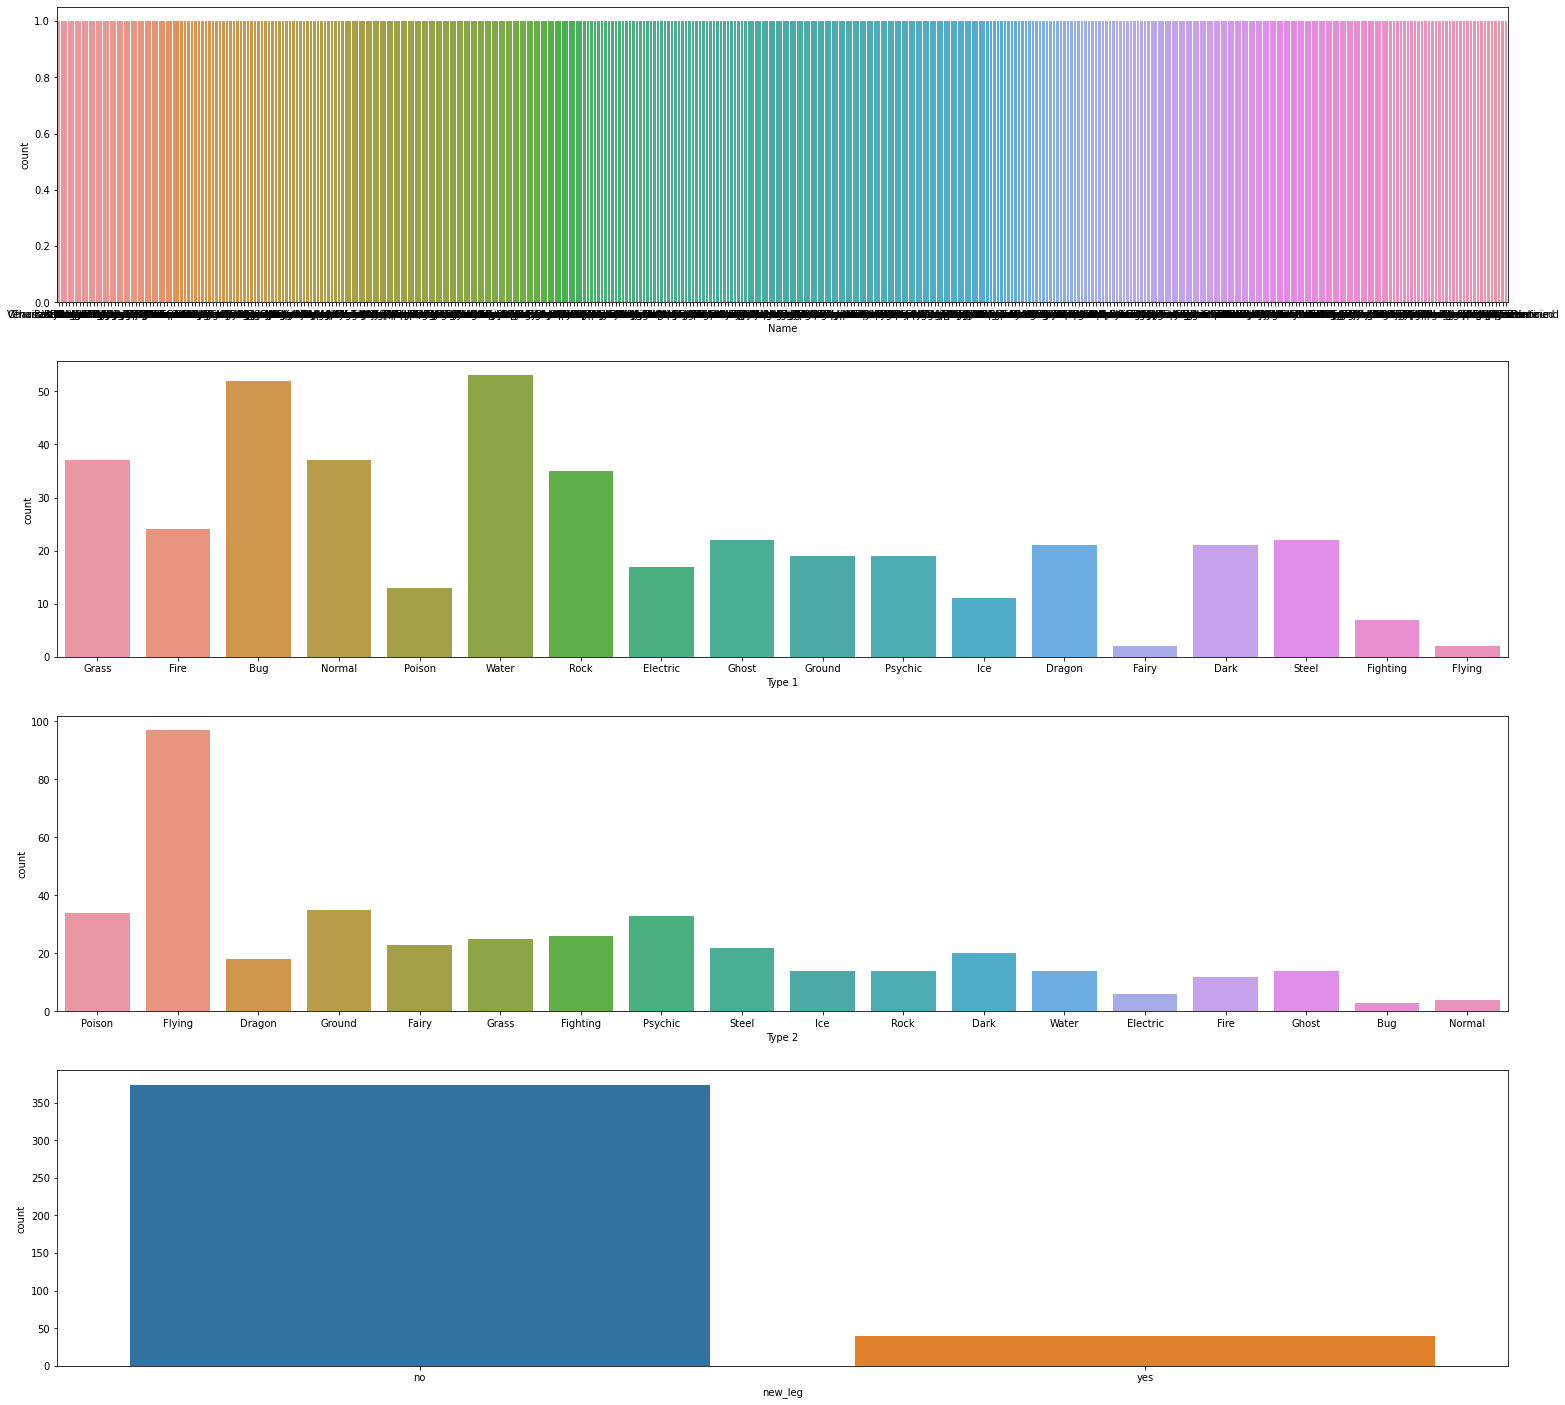

In [254]:
#distribution of catagorical variables
plt.figure(figsize=(26,25))
for i in range(len(obj)):
  plt.subplot(4, 1, i+1)
  sns.countplot(df_no_unknown[obj[i]])

In [255]:
#deal with catagorical data
df_no_unknown.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        414 non-null    object
 1   Type 1      414 non-null    object
 2   Type 2      414 non-null    object
 3   Total       414 non-null    int64 
 4   HP          414 non-null    int64 
 5   Attack      414 non-null    int64 
 6   Defense     414 non-null    int64 
 7   Sp. Atk     414 non-null    int64 
 8   Sp. Def     414 non-null    int64 
 9   Speed       414 non-null    int64 
 10  Generation  414 non-null    int64 
 11  new_leg     414 non-null    object
dtypes: int64(8), object(4)
memory usage: 62.0+ KB


In [256]:
obj

['Name', 'Type 1', 'Type 2', 'new_leg']

In [257]:
df_no_unknown['Type 1'].unique()

array(['Grass', 'Fire', 'Bug', 'Normal', 'Poison', 'Water', 'Rock',
       'Electric', 'Ghost', 'Ground', 'Psychic', 'Ice', 'Dragon', 'Fairy',
       'Dark', 'Steel', 'Fighting', 'Flying'], dtype=object)

In [258]:
df_no_unknown.reset_index(inplace=True)

In [259]:
df_no_unknown

,index,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,new_leg
0,0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,no
1,1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,no
2,2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,no
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,no
4,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,yes
410,796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,yes
411,797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,yes
412,798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,yes


In [260]:

for target in obj[1:]:
  new=[]
  t1=list(df_no_unknown[target].unique())
  for i in df_no_unknown[target]:
    new.append(t1.index(i))
  df_no_unknown[target]=pd.Series(new)
df_no_unknown.head()

,index,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,new_leg
0,0,Bulbasaur,0,0,318,45,49,49,65,65,45,1,0
1,1,Ivysaur,0,0,405,60,62,63,80,80,60,1,0
2,2,Venusaur,0,0,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,0,0,625,80,100,123,122,120,80,1,0
4,6,Charizard,1,1,534,78,84,78,109,85,100,1,0


In [262]:
for i in obj[1:]:
  print(i,df_no_unknown[i].unique())

Type 1 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Type 2 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
new_leg [0 1]


# Train a model

In [263]:
#define x and y
df_no_unknown.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       414 non-null    int64 
 1   Name        414 non-null    object
 2   Type 1      414 non-null    int64 
 3   Type 2      414 non-null    int64 
 4   Total       414 non-null    int64 
 5   HP          414 non-null    int64 
 6   Attack      414 non-null    int64 
 7   Defense     414 non-null    int64 
 8   Sp. Atk     414 non-null    int64 
 9   Sp. Def     414 non-null    int64 
 10  Speed       414 non-null    int64 
 11  Generation  414 non-null    int64 
 12  new_leg     414 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 42.2+ KB


In [270]:
y=df_no_unknown['Name'].iloc[:50]
x=df_no_unknown.drop(['Name','index'],axis='columns').iloc[:50]
x.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,new_leg
0,0,0,318,45,49,49,65,65,45,1,0
1,0,0,405,60,62,63,80,80,60,1,0
2,0,0,525,80,82,83,100,100,80,1,0
3,0,0,625,80,100,123,122,120,80,1,0
4,1,1,534,78,84,78,109,85,100,1,0


In [271]:
y.head()

0                Bulbasaur
1                  Ivysaur
2                 Venusaur
3    VenusaurMega Venusaur
4                Charizard
Name: Name, dtype: object

# H-clustering without nomalized data

In [272]:
#linkage matrix for H-clustering

from scipy.cluster.hierarchy import dendrogram

def get_linkage(model):
    # needed for visualization
    # from: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    return linkage_matrix

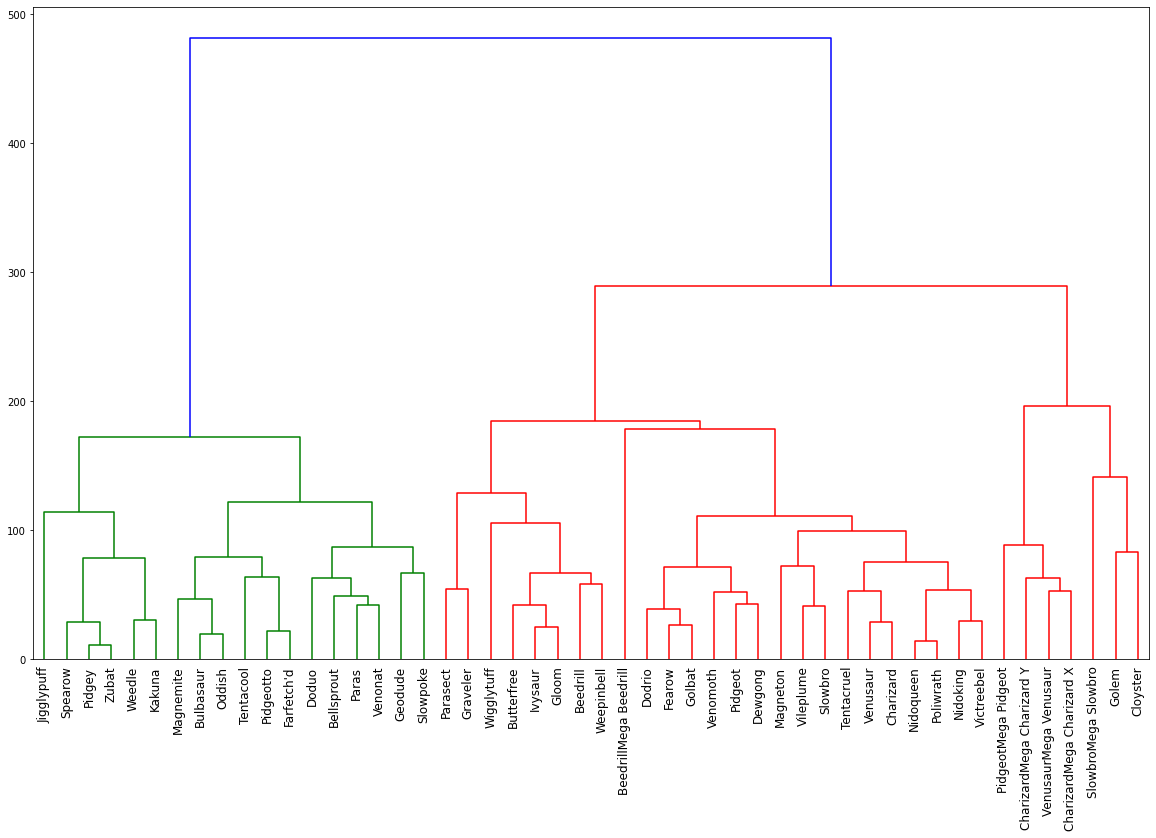

In [281]:
#run H-clustering (linkage = complete)

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize 

model = AgglomerativeClustering(linkage='complete', 
                                distance_threshold=0, # to calculate the full tree
                                n_clusters=None)
model = model.fit(x)

# get linkages 
links = get_linkage(model)
# plot the dendrogram
fig, ax = plt.subplots(figsize=(20, 12))
dendrogram(links,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=12, 
           ax=ax);

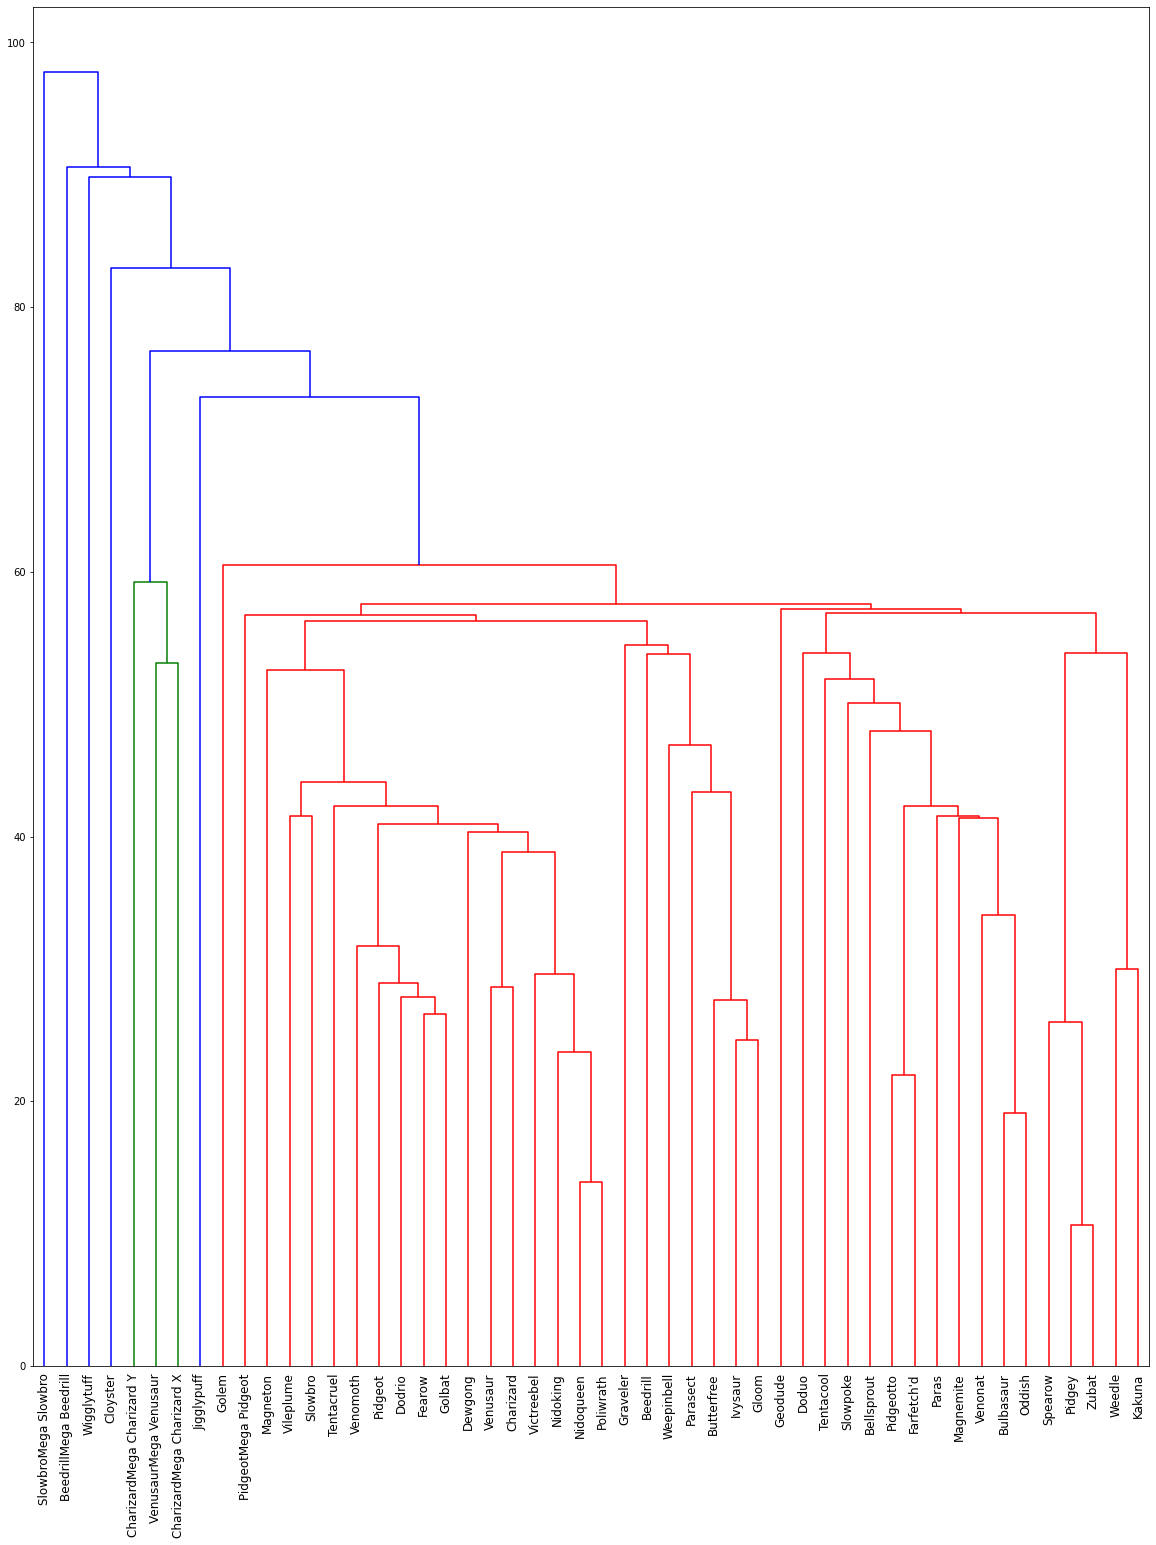

In [278]:
#run H-clustering (linkage = single)

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize 

model = AgglomerativeClustering(linkage='single', 
                                distance_threshold=0, # to calculate the full tree
                                n_clusters=None)
model = model.fit(x)

# get linkages 
links = get_linkage(model)
# plot the dendrogram
fig, ax = plt.subplots(figsize=(20, 25))
dendrogram(links,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=12, 
           ax=ax);

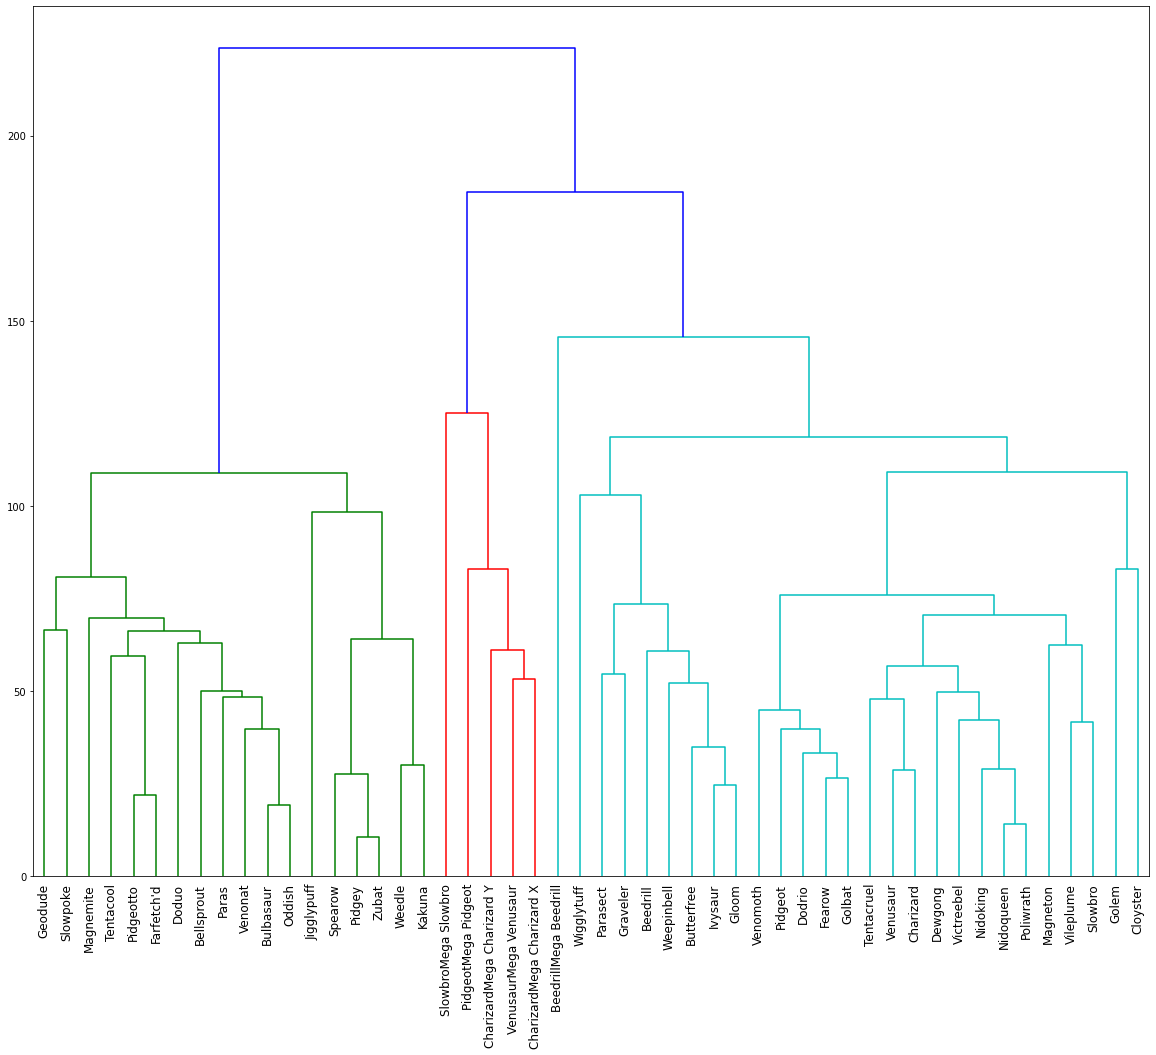

In [284]:
#run H-clustering (linkage = average)

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize 

model = AgglomerativeClustering(linkage='average', 
                                distance_threshold=0, # to calculate the full tree
                                n_clusters=None)
model = model.fit(x)

# get linkages 
links = get_linkage(model)
# plot the dendrogram
fig, ax = plt.subplots(figsize=(20, 16))
dendrogram(links,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=12, 
           ax=ax);

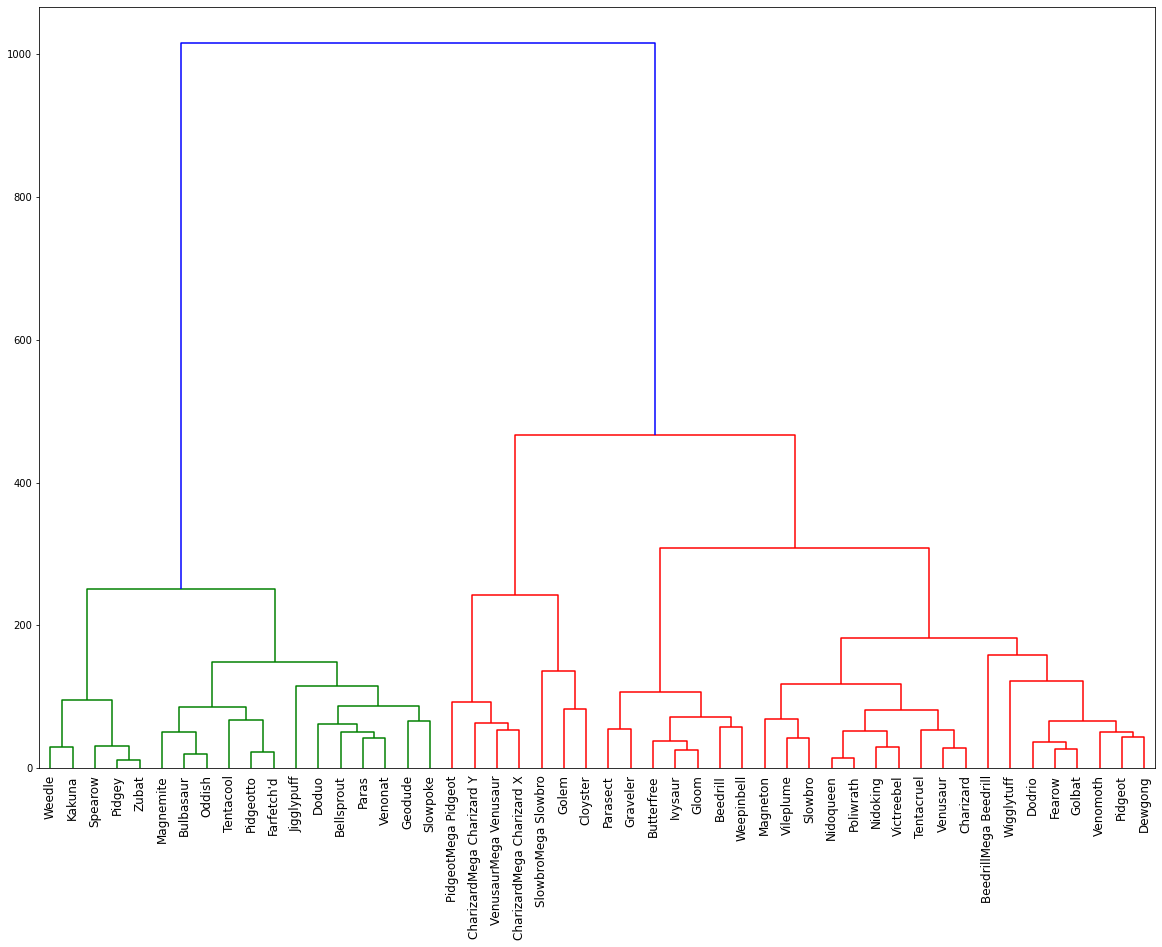

In [287]:
#run H-clustering (linkage = ward)

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize 

model = AgglomerativeClustering(linkage='ward', 
                                distance_threshold=0, # to calculate the full tree
                                n_clusters=None)
model = model.fit(x)

# get linkages 
links = get_linkage(model)
# plot the dendrogram
fig, ax = plt.subplots(figsize=(20, 14))
dendrogram(links,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=12, 
           ax=ax);

# H-clustering with normalized data

In [288]:
#run H-clustering with nomalized x

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize 

# normalize each row to be a unit vector
X_norm = normalize(x)

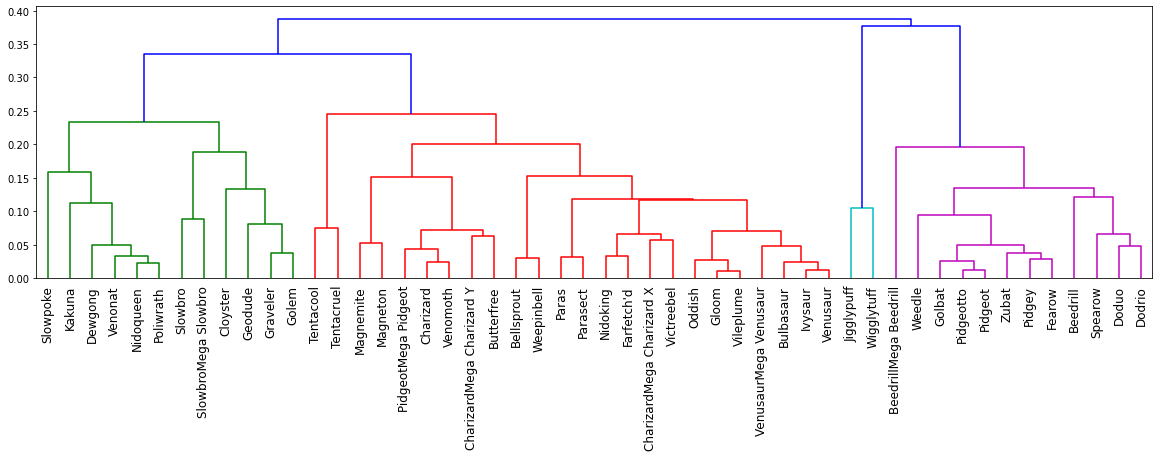

In [289]:
model = AgglomerativeClustering(linkage='complete', 
                                distance_threshold=0, 
                                n_clusters=None)
model = model.fit(X_norm)
    
links = get_linkage(model)

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(20, 5))
dendrogram(links,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=12, 
           ax=ax);

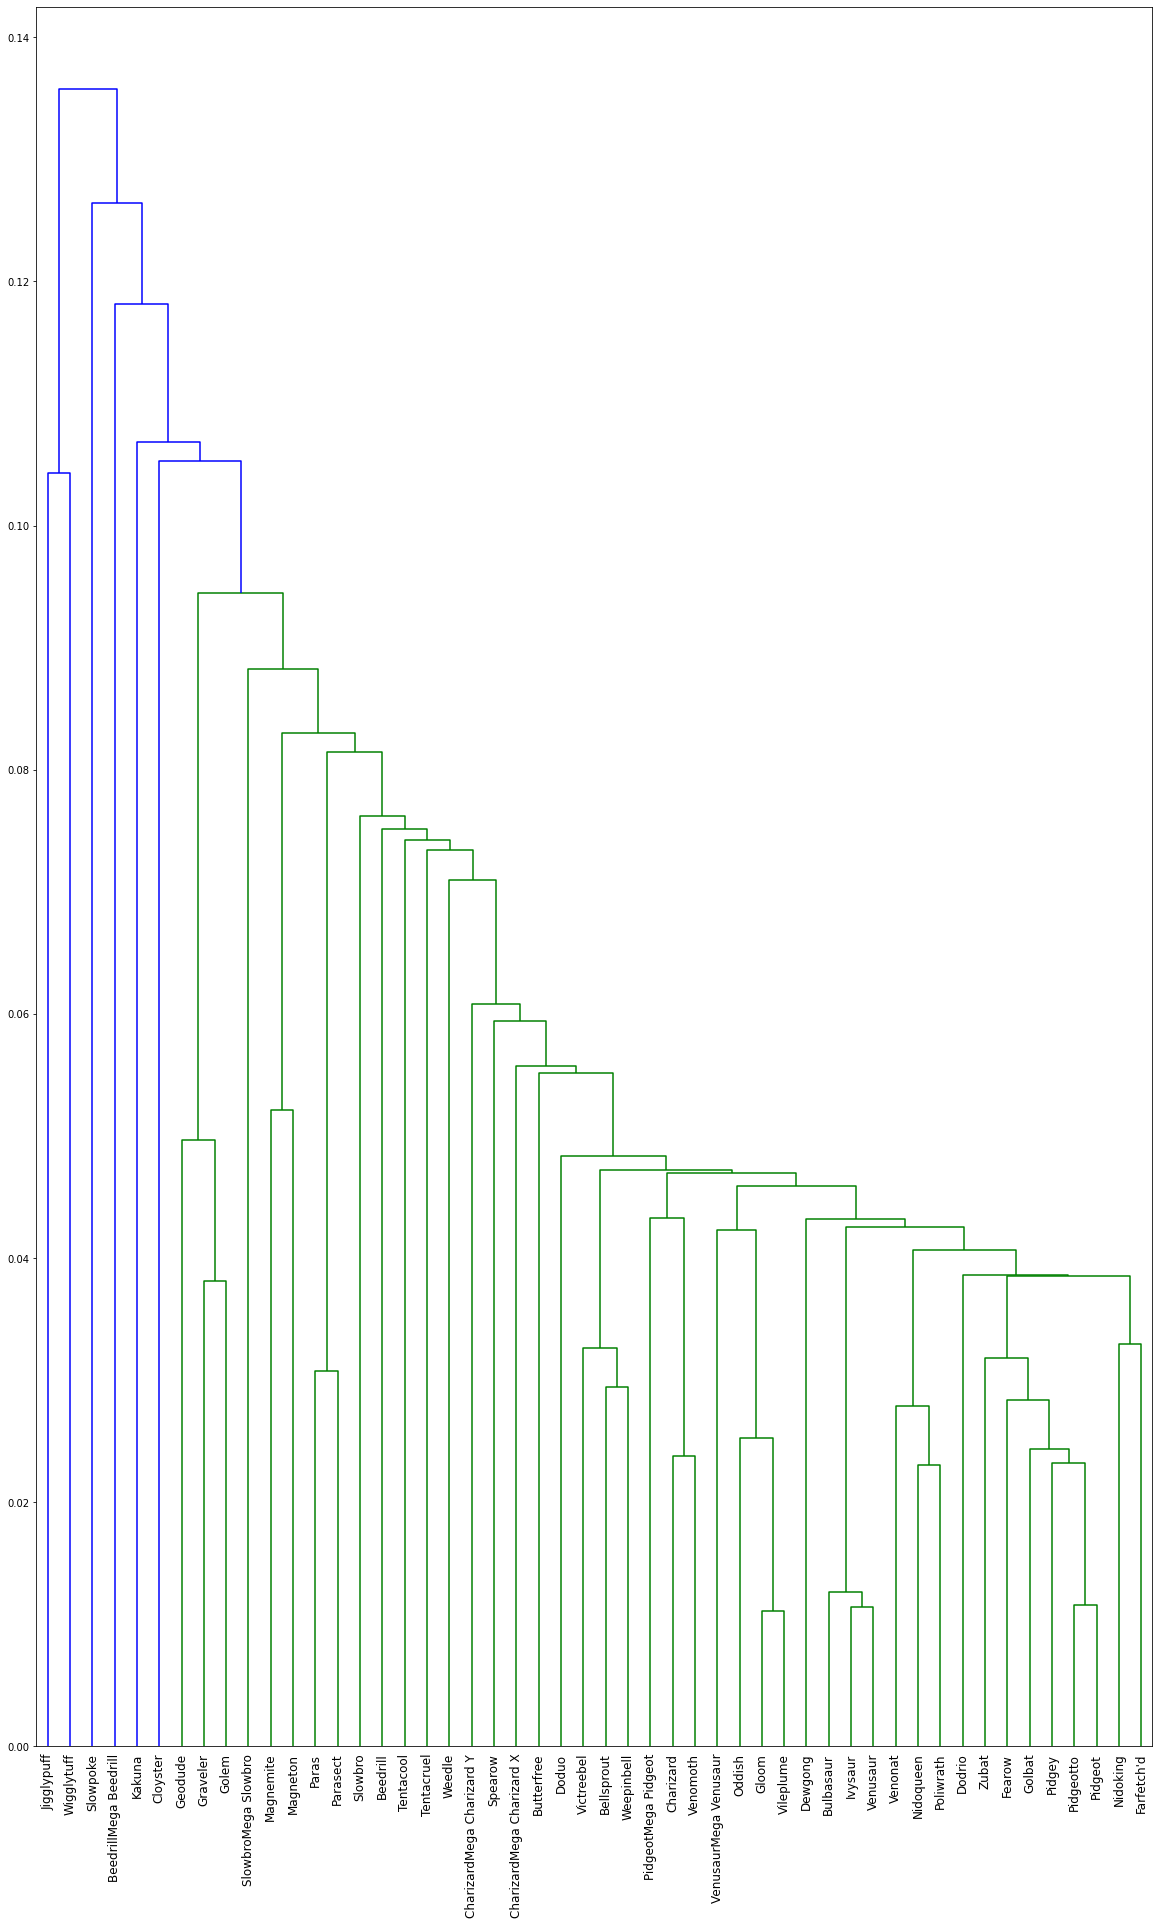

In [293]:
model = AgglomerativeClustering(linkage='single', 
                                distance_threshold=0, 
                                n_clusters=None)
model = model.fit(X_norm)
    
links = get_linkage(model)

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(20, 32))
dendrogram(links,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=12, 
           ax=ax);

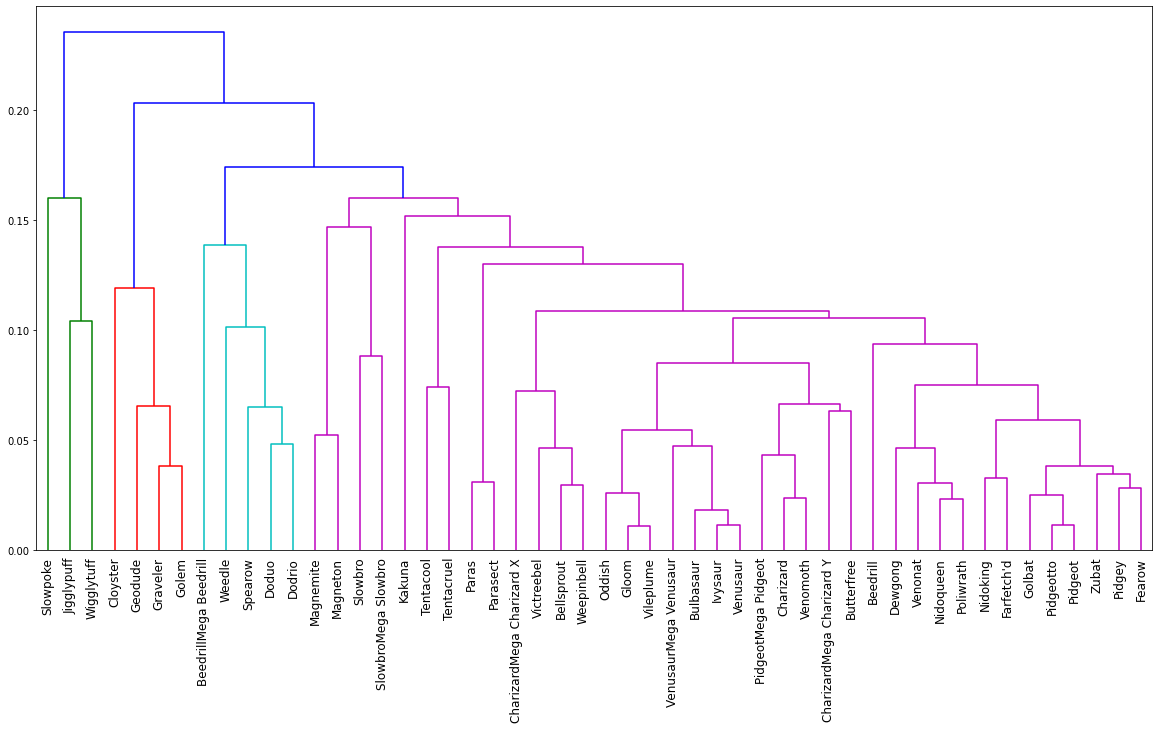

In [296]:
model = AgglomerativeClustering(linkage='average', 
                                distance_threshold=0, 
                                n_clusters=None)
model = model.fit(X_norm)
    
links = get_linkage(model)

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(20, 10))
dendrogram(links,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=12, 
           ax=ax);

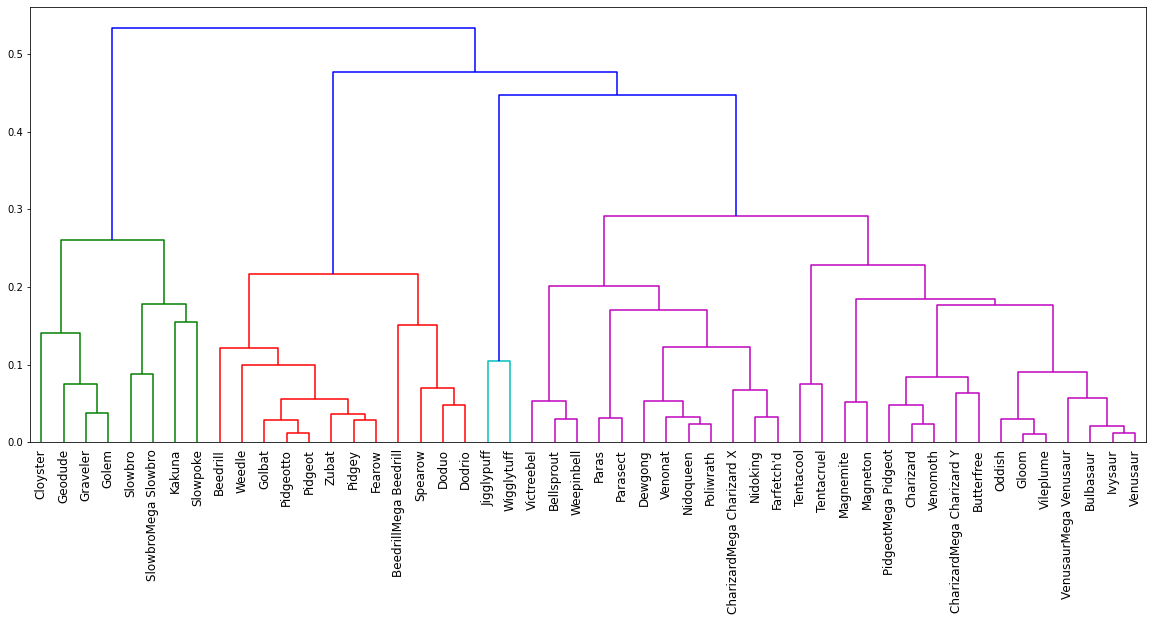

In [298]:
model = AgglomerativeClustering(linkage='ward', 
                                distance_threshold=0, 
                                n_clusters=None)
model = model.fit(X_norm)
    
links = get_linkage(model)

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(20, 8))
dendrogram(links,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=12, 
           ax=ax);

# Choosing the right linkage

In [ ]:
#Select linkage = complete (seem the best clustering one)

# Choosing the right n_cluster

In [320]:
#elbow method

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize 


model = AgglomerativeClustering(linkage='complete', 
                                distance_threshold=0, 
                                n_clusters=None)
model.fit(X_norm)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=0,
                        linkage='complete', memory=None, n_clusters=None)

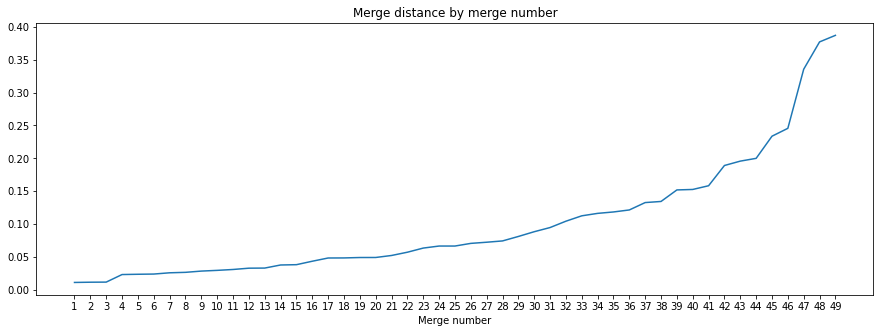

In [321]:
#plot elbow method

fig, ax = plt.subplots(figsize=(15, 5))
xticks = np.arange(1, 50)
ax.set_title('Merge distance by merge number')
ax.set_xticks(xticks)
ax.set_xlabel('Merge number')
ax.plot(xticks, model.distances_)

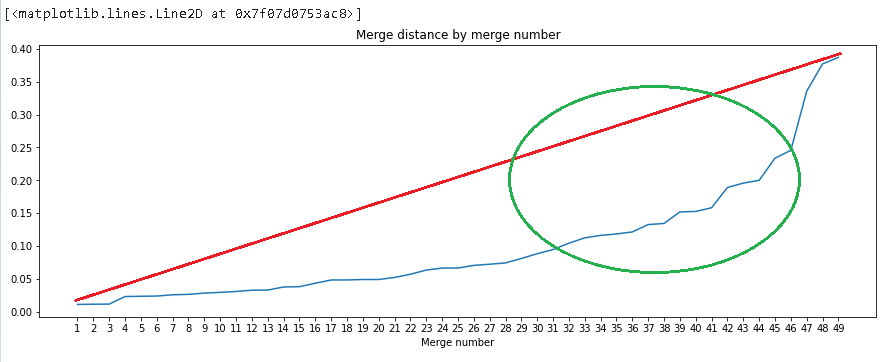

In [ ]:
#green circle = the maximum distance from a red line to a blue line
#n_cluster = 49 - (35 to 45) = 4 to 14 

# Try the model

In [322]:
#predict the outcome

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize 


# 8 seems to be the number of clusters (corresponds to 52 merges)
model = AgglomerativeClustering(linkage='complete', 
                                n_clusters=4)
y_pred = model.fit_predict(X_norm)
print(y_pred)

[0 0 0 0 0 0 0 0 3 1 3 3 3 3 3 0 3 3 1 0 2 2 3 3 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 1 0 0 0 3 3 1 1]


In [324]:
#show prediction

df2 = pd.DataFrame({
    'Name': y,
    'cluster': y_pred,
})
df2

,Name,cluster
0,Bulbasaur,0
1,Ivysaur,0
2,Venusaur,0
3,VenusaurMega Venusaur,0
4,Charizard,0
5,CharizardMega Charizard X,0
6,CharizardMega Charizard Y,0
7,Butterfree,0
8,Weedle,3
9,Kakuna,1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


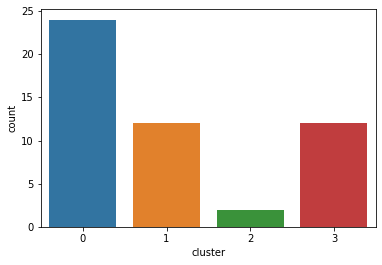

In [325]:
sns.countplot(df2['cluster'])